In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
gold_data = pd.read_csv("/content/gld_price_data.csv")

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
gold_data.shape

(2290, 6)

In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
correlation = gold_data.corr()

In [14]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

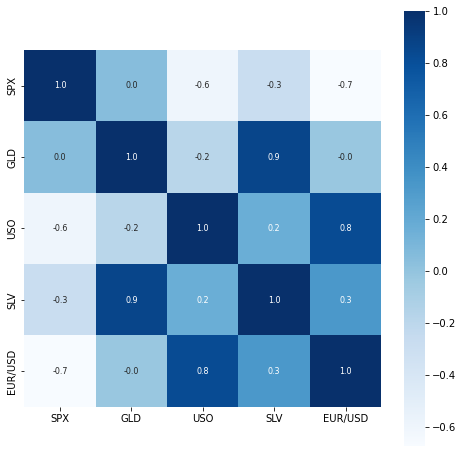

In [16]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt=".1f",annot=True, annot_kws={"size":8},cmap="Blues")

In [17]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-18-f1681fd89a50>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data["GLD"],color="green")


<Axes: xlabel='GLD', ylabel='Density'>

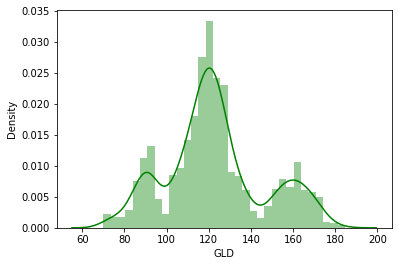

In [18]:
sns.distplot(gold_data["GLD"],color="green")

In [19]:
x = gold_data.drop(["GLD","Date"],axis=1)
y = gold_data["GLD"]

In [20]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [23]:
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [26]:
test_data_prediction = regressor.predict(x_test)

In [27]:
print(test_data_prediction)

[163.67040032 127.55209942 124.20879989 119.51119902 126.07369881
  85.94489817 171.81420122 136.25030095 106.74780055 132.84610162
 120.84329953 124.92780058 143.18289881 104.56409977  80.82499924
 120.04480005 139.8559998   90.2119009   91.46579921 128.37890242
 125.7917993  148.13610011 116.87620173 153.01299895 129.5053986
 129.46530098 118.4637013  111.48140052 168.43720225 157.9338983
 125.90610151 153.94810192 127.02859968 122.74619762 116.79450121
 154.73870025 114.9197004  120.34150136 104.27850221 105.52960064
 134.41640002  86.02869996 156.86060092 121.28210003 122.34610078
 155.40110058 120.33930032 116.6096     168.68380226 116.30850064
 138.3568021  161.4729989  158.33050064 152.96660011 123.86080024
 117.00399994 167.189601   117.30799979 165.66240066  84.20239971
 121.4060988  122.10210029 119.94230036 171.98139847 118.91069945
 180.69619699 161.52020293 138.70350293 115.66389975  92.84580042
 171.89239948 117.47489982 117.74619894 125.49170018 147.6556
  91.14010106  8

In [28]:
error_score = metrics.r2_score(y_test,test_data_prediction)

In [31]:
print("R squared error:",error_score)

R squared error: 0.9856586833593273


In [32]:
y_test = list(y_test)

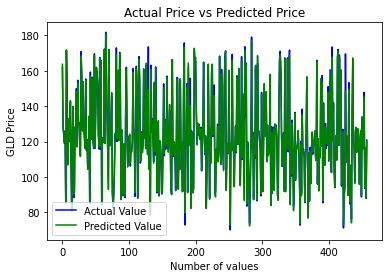

In [33]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()